<p> <strong>Nama:</strong> Naufal Prima Yoriko</p>
<p> <strong>Email:</strong> primayoriko@gmail.com </p>
<p> <strong>Username:</strong> primayoriko </p>
<p> <strong>Dicoding Profile:</strong> https://www.dicoding.com/users/primayoriko </p>


# **Submission PaperRockScissors**

Sebelum menuju ke langkah pengerjaan, ini terdapat beberapa referensi yang saya pakai

1.   Neural Network Activation Function in Keras
     *   https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/
     *   https://keras.io/api/layers/activations/

2.   Loss Function in Keras
     *   https://neptune.ai/blog/keras-loss-functions
     *   https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
     *   https://keras.io/api/losses/
     *   https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

3.   Callback in Keras
     * https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/

4.   Optimization in Keras
     * https://keras.io/api/optimizers/ 

5.   Performance comparison
     * https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
     * https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
     * https://www.kaggle.com/c/human-protein-atlas-image-classification/discussion/70253



Berikut ini adalah tahap-tahap pengerjaan yang saya lakukan dalam memeroleh hasil dari Image Processing menggunakan CNN (*Convolutional Neural Network*)

**Pertama**, mendownload file dari web dicoding dengan menggunakan utilitas `wget`

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-02 03:16:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  24.9MB/s    in 13s     

2020-11-02 03:16:17 (23.6 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**Kedua**, melakukan ekstraksi dari file yang didownload dengan menggunakan `zipfile`

In [2]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Ketiga**, dengan menggunakan library tambahan yaitu `split-folder`, saya melakukan splitting dari file-file gambar menjadi training (`train`) dan validation (`val`) data. 

**Note:** referensi split saya dapat dari forum dicoding, saya rasa karena dari forum, bukan website luar, tidak apa-apa untuk diikuti

In [3]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/splitted', seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3214.70 files/s]


**Keempat**, saya mencatat direktori dari tiap tipe data, `train` dan `val` data

In [4]:
base_dir = '/tmp/rockpaperscissors/splitted'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
print(train_dir)
print(validation_dir)

/tmp/rockpaperscissors/splitted/train
/tmp/rockpaperscissors/splitted/val


**Kelima**, mencatat direktori dari tiap-tiap kategori gambar dan juga mencatat total file image di tiap segmennya, untuk berjaga semisal akan dibutuhkan kedepannya.

In [5]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_rock_dir = os.path.join(train_dir, 'rock')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')

train_paper = len(os.listdir(train_paper_dir))
train_scissors = len(os.listdir(train_scissors_dir))
train_rock = len(os.listdir(train_rock_dir))

validation_paper = len(os.listdir(validation_paper_dir))
validation_scissors = len(os.listdir(validation_scissors_dir))
validation_rock = len(os.listdir(validation_rock_dir))

total_train = train_paper + train_scissors + train_rock
total_validation = validation_paper + validation_scissors + validation_rock

print(total_train)
print(total_validation)

1312
876


**Keenam**, pembuatan generator image dari gambar-gambar yang tersedia, dengan menggunakan `ImageDataGenerator` dari Keras. Fungsi dari image data generator ini adalah untuk membantu mengklasifikasikan suatu gambar ke kategoti tertentu karena pada gambar mungkin ada faktor tertentu yang membedakan tampilan (diluar karena perbedaan objek), seperti jarak/ukuran, orientasi, gradasi warna, dll.

Disini kode yang digunakan kurang lebih seperti yang ada di modul `Latihan Membuat Model Klasifikasi Gambar` di kelas ini, namun memiliki beberapa tambahan pada generate image `train` yaitu

1.   Shifting lebar dari gambar dengan range 0.2
2.   Shifting tinggi dari gambar dengan range 0.2
3.   Shifting zoom/perbesaran gambar dengan range 0.2



In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode = 'nearest'
                  )

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    horizontal_flip=True,
                    fill_mode = 'nearest'
                  )

**Keenam**, Membuat pengaturan dimensi image, class, dan juga flow dari transfer data image dalam pembuatan model di tiap batchnya.

Disini kode yang digunakan kurang lebih seperti yang ada di modul `Latihan Membuat Model Klasifikasi Gambar` di kelas ini. Namun, terdapat penyesuaian size tiap batch-nya sekaligus `class_mode` nya.

Flow diatur agar pada satu epoch seluruh data pada dataset termuat untuk fitting model, atau 


```
   steps_per_epoch * batch_per_steps ~ total data
```

Selain itu gambar yang digenerate disetting agar memiliki dimensi `150x150`.



In [7]:
from math import ceil

# Diasumsikan akan dibuat dibuat 25 step tiap epoch
steps_per_epoch = 25

# Maka berikut ini jumlah file di tiap flow
train_per_batch = ceil(total_train/steps_per_epoch)
val_per_batch = ceil(total_validation/steps_per_epoch)
print(train_per_batch)
print(val_per_batch)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=train_per_batch,
                    class_mode='categorical'
                  )
 
validation_generator = test_datagen.flow_from_directory(
                          validation_dir,
                          target_size=(150, 150),
                          batch_size=val_per_batch,
                          class_mode='categorical'
                        )

53
36
Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**Ketujuh**, membuat struktur dari CNN. CNN yang dibuat disini, sesuai spesifikasi menggunakan model sequensial, yang susunannya dibebaskan (asal memiliki > 1 hidden layer).

Disini kode/model yang digunakan memiliki struktur dasar dari `Latihan Membuat Model Klasifikasi Gambar` di kelas ini. Namun, metode penulisan dibuat lebih modular dan juga secara umum dapat dijelaskan bahwa struktur CNN yang sequensial memiliki 1 layer input, 9 layer hidden, dan 1 layer output.

Aksi yang dilakukan antara lain dapat diringkas sebagai berikut

1.   Input (beririsan dengan convolution layer) meminta input sebesar `150x150` piksel.
2.   Convolution layer untuk melakukan konvolusi katriks dari piksel gambar 2D dengan filters digunakan berturut 32, 64, 128, dan 256. Kernel size yang digunakan berukuran 3x3. Activation function adalah menggunakan `relu`, dengan alasan `relu` cukup ringan secara komputasi dan cukup baik dalam mengestimasi hidden layer
3.   MaxPooling Layer untuk melakukan max pool elemen pada matriks dari piksel gambar, yaitu mengambil max value dari tiap submatriks.
4. Dense Layer
5. Flatten Layer untuk melakukan reduksi dimensi dari matriks piksel gambar.
6. Sebelumnya digunakan dropout layer untuk melakukan deaktivasi layer secara random guna menghindari overfitting, namun karena yang ingin dicapai adalah akurasi tertinggi maka layer ini dihilangkan.
7. Output layer guna mengeluarkan hasil akhir, pada layer ini digunakan activation function yang berbeda. Dari explorasi sumber dan experimen langsung, ditemukan activation function yang baik adalah `softmax` dan `sigmoid`, namun karena `softmax` sedikit lebih baik (khusus untuk activation akhir/output dan juga bisa identifikasi kelas) maka digunakan `softmax`.




In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential(name="simple_sequential")
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation= 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation= 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation= 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dense(512, activation= 'relu'))
model.add(Flatten())
model.add(Dense(3, activation= 'softmax'))

# Sebagai alternatif ingin menggunakan sigmoid, bukan softmax ganti 
# baris kode diatas dengan baris kode berikut 

# model.add(Dense(3, activation= 'sigmoid'))

**Kedelapan**, menggunakan `model.compile()` untuk melakukan setting sebelum melakukan ftting dari model kita, disini digunakan beberapa bonus yang tidak dijelaskan secara mendalam di kelas, yaitu 


1.   Loss function, terkait dengan cost atau dengan kata lain nilai objektif dari pembelajaran algoritma CNN. Dari referensi diatas dan eksperimen diperoleh loss function yang baik dan sesuai dengan use case,
     * `categorical_crossentropy`, secara umum digunakan untuk kategorisasi objek yang memiliki beberapa kelas klasifikasi (> 2) namun tetap lingkupnya diskrit. 
     * `SigmoidFocalCrossEntropy`, secara khusus digunakan untuk image classification
     <p> Namun berdasarkan eksperimen, lebih tinggi akurasi dengan menggunakan `categorical_crossentropy`, maka loss function inilah yang akan lebih diprefer untuk kasus ini sekaligus digunakan sebagai example. </p>
2.   Optimizer, guna mengpotimasi algortima, berdasar sumber diatas dan eksperimen, diperoleh alternatif optimizer function yang baik adalah
     * `Adam` + AMSGrad (paling stabil dan rata-rata paling tinggi)
     * `Adam` *no tuning*
     * `SGD` + Momentum
     * `SGD` + Momentum + Nesterov (secara rata-rata lebih jelek, namun terkadang bisa lumayan tinggi)
     * `RMSProp`
<p>Karena pertimbangan diatas, maka saya akan mencontohkan dengan menggunakan Adam + tuning AMSGrad.</p> 
3.   Metrics, yakni hal yang ingin menjadi pertimbangan dan ditampilkan saat proses fitting. Oleh karena yang diminta adalah accuracy, maka metric hanya diisi dengan accuracy. 



In [9]:
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from keras.optimizers import SGD, Adam

loss = 'categorical_crossentropy'

# Untuk opsi lain dari loss, ganti dengan salah satu loss dibawah ini

# loss = SigmoidFocalCrossEntropy()

opt = Adam(amsgrad=True, lr=0.001)

# Untuk opsi lain dari optimizer, ganti dengan salah satu opt dibawah ini

# opt = SGD(
#     lr=0.01, momentum=0.9, nesterov=False
# )

# opt = 'rmsprop'

# opt = Adam()

model.compile(loss=loss,
              optimizer=opt,
              metrics=['accuracy'])

**Kesembilan**, dilakukan fitting model dengan method `model.fit()`, disini juga dilakukan komputasi waktu training model dengan library bawaan `time`. Berikut ini juga dirinci beberapa konfigurasi pada fitting dan juga ada beberapa yang tidak diajarkan di kelas, 


1.   Steps atau langkah yang dilakukan tiap epoch sebanyak 25 (lihat langkah pengerjaan keenam)
2.   Epoch untuk training data sebanyak 20
3.   Validation step dan verbose berturut-turn 5 dan 2
4.   Digunakan callback bawaan dari keras yang memiliki fungsi
     * `EarlyStopping`, berfungsi untuk menghentikan lebih awal jika setelah N turn hasil yang didapatkan tidak membaik, disini disetting N = 4 dan juga mengembalikan nilai terbaik.
     * `ReduceLROnPlateau`, berfungsi untuk mengurangi parameter *Learning Rate* dari algoritma saat berada di *Plateau* (sekitar puncak lokal) untuk menghindari penurunan akurasi secara curam, disini diatur `patience` sebesar 2.





In [10]:
from time import time
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

start_time = time()
schema = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=5,
        verbose=2,
        callbacks=[
           EarlyStopping(patience=4, restore_best_weights=True),
           ReduceLROnPlateau(patience=2)
        ]
      )
print("--- Finished in %s seconds ---" % (time() - start_time))

Epoch 1/20
25/25 - 68s - loss: 1.0781 - accuracy: 0.4245 - val_loss: 0.8487 - val_accuracy: 0.7222
Epoch 2/20
25/25 - 67s - loss: 0.8454 - accuracy: 0.6212 - val_loss: 0.4229 - val_accuracy: 0.8111
Epoch 3/20
25/25 - 67s - loss: 0.5725 - accuracy: 0.7835 - val_loss: 0.2942 - val_accuracy: 0.9056
Epoch 4/20
25/25 - 70s - loss: 0.4439 - accuracy: 0.8476 - val_loss: 0.3038 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 68s - loss: 0.4528 - accuracy: 0.8232 - val_loss: 0.1784 - val_accuracy: 0.9722
Epoch 6/20
25/25 - 67s - loss: 0.3656 - accuracy: 0.8575 - val_loss: 0.1929 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 67s - loss: 0.3615 - accuracy: 0.8681 - val_loss: 0.1462 - val_accuracy: 0.9667
Epoch 8/20
25/25 - 67s - loss: 0.2803 - accuracy: 0.9024 - val_loss: 0.1410 - val_accuracy: 0.9611
Epoch 9/20
25/25 - 67s - loss: 0.2654 - accuracy: 0.9146 - val_loss: 0.1347 - val_accuracy: 0.9611
Epoch 10/20
25/25 - 67s - loss: 0.2302 - accuracy: 0.9207 - val_loss: 0.0975 - val_accuracy: 0.9778
Epoch 11/

Dari sini, didapati akurasi terbaik sebesar **100%** dan sebesar **99.44%** di akhir pada `val` data, sedangkan akurasi terbaik sebesar **98.40%** dan sebesar **98.09%** di akhir pada `train` data. Untuk waktu eksekusi, training dan validasi data memakan waktu selama **1415 s** ~ **24 min**

**Kesepuluh**, semisal anda ingin mencoba memasukkan untuk menguji suatu image tangan guna diklasifikasikan ke dalam salah satu kategori (paper, rock, scissors) dapat digunakan kode berikut.

Disini adalah sedikit modifikasi dari kode di modul `Latihan Membuat Model Klasifikasi Gambar` di kelas ini, namun memiliki beberapa modifikasi karena ini klasifikasi kategorikal.

Saving 2F8Ng7620ANA7tEK.png to 2F8Ng7620ANA7tEK.png
paper


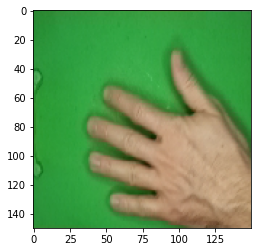

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  if(classes[0][0] == 1):
    print('paper')
  elif(classes[0][1] == 1):
    print('rock')
  else:
    print('scissors')

Dapat dilihat posisi tangan berhasil ditebak dengan menggunakan model CNN.